In [5]:
# https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

In [6]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [7]:
df = pd.read_csv("C:/Users/Demoser/Desktop/Data science projects/Bengaluru house price prediction/Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [9]:
print ("Rows     : " , df.shape[0])
print ("Columns  : " , df.shape[1])
print ("\nFeatures : \n" , df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :\n", df.nunique())

Rows     :  13320
Columns  :  9

Features : 
 ['area_type', 'availability', 'location', 'size', 'society', 'total_sqft', 'bath', 'balcony', 'price']

Missing values :   6201

Unique values :
 area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64


In [10]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [11]:
df.drop(['area_type','availability','society','balcony'], axis='columns', inplace=True)
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [12]:
# Handle missing values
df.dropna(inplace=True)

In [13]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [15]:
df['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [16]:
df[df['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [17]:
# Looks like some total_sqft values are in range
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [19]:
df[~df['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [20]:
def range_to_sqft(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [21]:
df1 = df.copy()
df1['total_sqft'] = df1['total_sqft'].apply(range_to_sqft)

In [22]:
df1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [23]:
df1.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

In [24]:
# Usually property price are expressed in price_per_sqft
df2 = df1.copy()
df2['price_per_sqft'] = round(df2['price']*100000/df2['total_sqft'],2)
df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.00


In [25]:
len(df2['location'].unique())

1304

In [26]:
# Remove extra spaces in location name
df2.location = df2.location.apply(lambda x :x.strip())
location_stats = df2.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [27]:
# Less than 10 house locations
len(location_stats[location_stats<=10])

1052

In [28]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [29]:
len(df2.location.unique())

1293

In [30]:
df2.location = df2.location.apply(lambda x : 'other' if x in location_stats_less_than_10 else x)
df2.head(15)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.00
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.86
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.06
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.82
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.24
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.51


In [31]:
len(df2.location.unique())

242

In [32]:
# Outlier detection
# Typical square feet per bedroom is 300
df2[df2['total_sqft']/df2['bhk']<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.51
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.33
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.98
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.30
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.00


In [33]:
df2.shape

(13246, 7)

In [34]:
# Remove such data
df3 = df2[~(df2['total_sqft']/df2['bhk']<300)]

In [35]:
df3.shape

(12502, 7)

In [36]:
df3.price_per_sqft.describe()

count     12456.000000
mean       6308.502836
std        4168.127366
min         267.830000
25%        4210.530000
50%        5294.120000
75%        6916.670000
max      176470.590000
Name: price_per_sqft, dtype: float64

In [37]:
# Remove extreme cases (max      176470.590000)
# price_per_sqft per location because price varies
# Use z scores to remove outliers
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf['price_per_sqft'])
        st = np.std(subdf['price_per_sqft'])
        reduced_df = subdf[(subdf['price_per_sqft']>(m-st)) & (subdf['price_per_sqft']<=(m+st))]
        df_out = pd.concat([df_out,reduced_df], ignore_index=True)
    return df_out
df4 = remove_pps_outliers(df3)
df4.shape

(10241, 7)

In [38]:
# Check price of 3 bhk greater than 2 bhk for respective location
df4.groupby(['location','bhk'])['price_per_sqft'].mean()

location             bhk
1st Block Jayanagar  2      11983.810000
                     3      11756.166667
                     4      15018.710000
1st Phase JP Nagar   1       5952.380000
                     2       7931.806250
                                ...     
other                9       5530.842500
                     10      9005.680000
                     11      4850.000000
                     13      5069.120000
                     16      5500.000000
Name: price_per_sqft, Length: 801, dtype: float64

In [39]:
def plot_scatter_plot(df,location):
    bhk2 = df[(df['location']==location)& (df['bhk']==2)]
    bhk3 = df[(df['location']==location)& (df['bhk']==3)]
    plt.figure(figsize=(15,10))
    plt.scatter(bhk2['total_sqft'], bhk2['price'],
                color ='blue', label = '2 BHK', s=50)
    plt.scatter(bhk3['total_sqft'], bhk3['price'],
                color ='green',marker='x', label = '3 BHK', s=50)
    plt.xlabel("Total Square feet area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    plt.show()


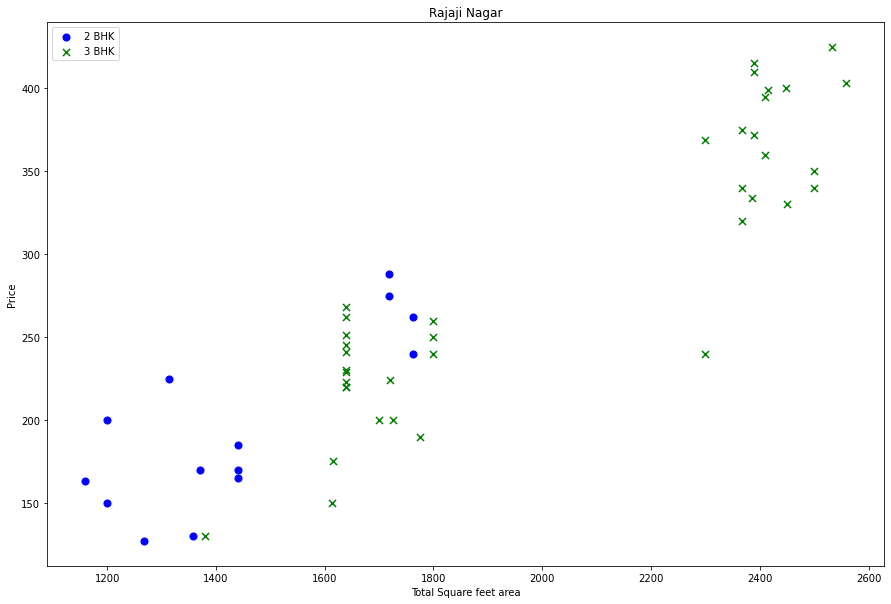

In [40]:
plot_scatter_plot(df4,'Rajaji Nagar')

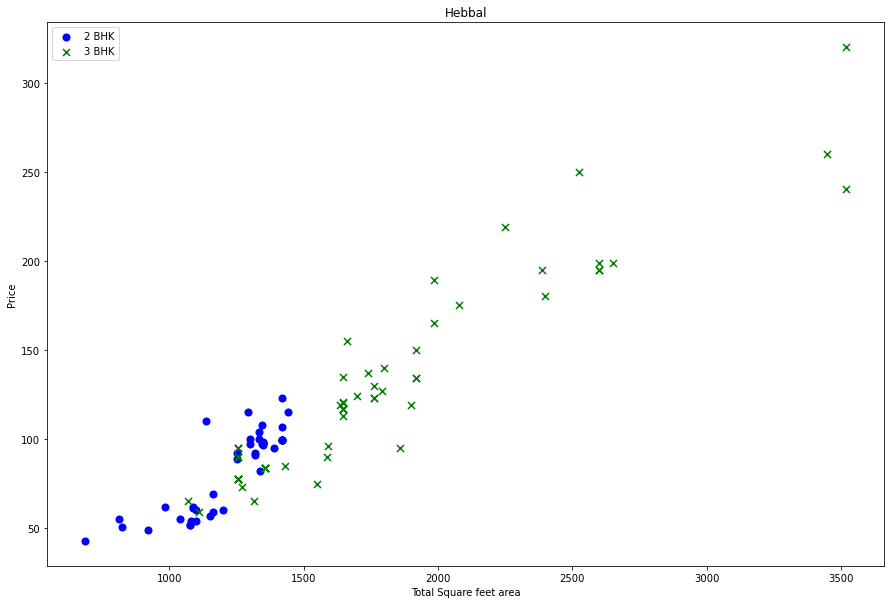

In [41]:
plot_scatter_plot(df4,'Hebbal')

In [42]:
# Some 2 BHK prices are higher than 3 BHK which is not ideal
# Remove such datapoints
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location , location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={'mean': np.mean(bhk_df['price_per_sqft']),
                           'std': np.std(bhk_df['price_per_sqft']),
                           'count': bhk_df.shape[0]}
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,
                                           bhk_df[bhk_df['price_per_sqft']<stats['mean']].index.values)
    return df.drop(exclude_indices, axis = 'index')
df5 = remove_bhk_outliers(df4)
df5.shape
    

(7329, 7)

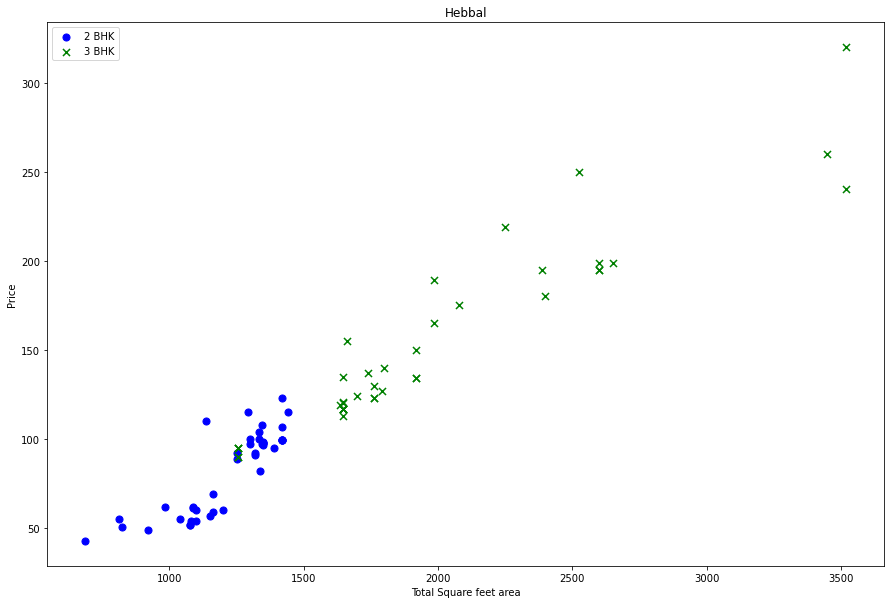

In [43]:
plot_scatter_plot(df5,'Hebbal')

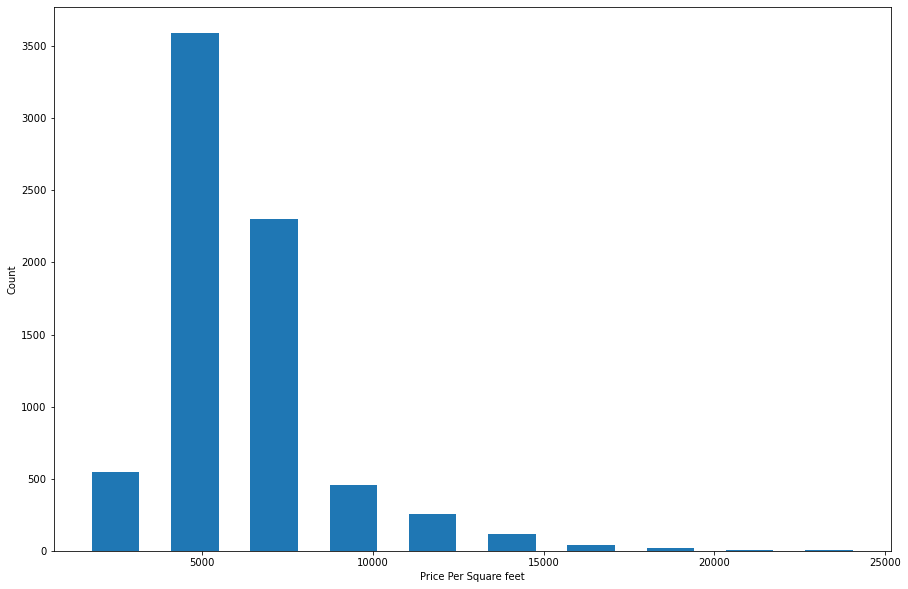

In [44]:
plt.figure(figsize=(15,10))
plt.hist(df5['price_per_sqft'], rwidth=0.6)
plt.xlabel('Price Per Square feet')
plt.ylabel("Count")
plt.show()

In [45]:
df5['bath'].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [46]:
# 2 BHK usually have 2 or 3 or 4 bathrooms, not more than that, same for all BHKs
df5[df5['bath']>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.00
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.00
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.00
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.00
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.12


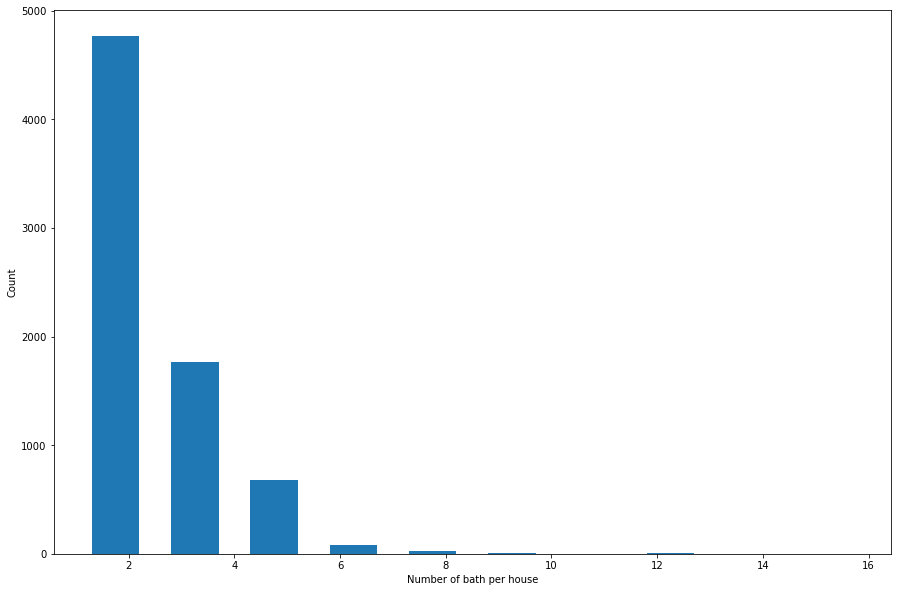

In [47]:
plt.figure(figsize=(15,10))
plt.hist(df5['bath'], rwidth=0.6)
plt.xlabel('Number of bath per house')
plt.ylabel("Count")
plt.show()

In [48]:
df5[df5['bath']>df5['bhk']+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.03
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.57
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.03
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.90


In [49]:
df5.shape

(7329, 7)

In [50]:
# Removing houses with bath gretaer than number of bhk + 2
df6 = df5[df5['bath']<df5['bhk']+2]
df6.shape

(7251, 7)

In [51]:
# We have bhk to represent size and total_sqft to represent price_per_sqft
df7 = df6.drop(['size','price_per_sqft'],axis = 1)
df7.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [52]:
# Encoding
dummies = pd.get_dummies(df7['location'])
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df8 = pd.concat([df7, dummies.drop('other',axis='columns')], axis = 'columns')
df8.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df8.drop('location',axis='columns', inplace=True)
df8.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df8.shape

(7251, 245)

In [65]:
# Model Building
X = df8.drop('price', axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
y = df8.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [73]:
# Train and Test data split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

In [74]:
reg_lin = LinearRegression()
reg_lin.fit(X_train,y_train)
reg_lin.score(X_test, y_test)

0.8243018623638978

In [75]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [76]:
# Other regression techniques
# hyper parameter tuning
def best_model(X,y):
    algos = {'linear_regression':{'model': LinearRegression(),
                                 'params':{'normalize': [True, False]}
                                 },
            'lasso': {'model': Lasso(),
                     'params':{'alpha':[1,2],
                              'selection': ['random','cyclic']}
                     },
            'decision_tree': {'model': DecisionTreeRegressor(),
                     'params':{'criterion':['mse','friedman_mse'],
                              'splitter': ['best','random']}
                             }
            }
    
    scores = []
    
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'],
                          cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({'model': algo_name,
                      'best_score': gs.best_score_,
                      'best_params': gs.best_params_})
        
    return pd.DataFrame(scores, columns=['model','best_score', 'best_params'])

In [77]:
best_model(X,y)

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': False}
1,lasso,0.687440,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.725097,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [79]:
# Prediction
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns == location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >=0:
        x[loc_index] = 1
        
    return reg_lin.predict([x])[0]

In [80]:
predict_price('1st Block Jayanagar',2850,4,4)

344.48544380338944

In [81]:
predict_price('1st Phase JP Nagar',1000,2,2)

89.83010079821771

In [82]:
predict_price('1st Phase JP Nagar',1000,2,3)

88.36729917425764

In [83]:
predict_price('1st Phase JP Nagar',1000,3,3)

93.45004795035811

In [84]:
predict_price('Indira Nagar',1000,2,2)

172.82412987714542

In [85]:
predict_price('Indira Nagar',1000,3,3)

176.44407702928584

In [86]:
predict_price('Indira Nagar',1650,3,3)

227.93215453078602

In [ ]:
# Export model Pickel file to be used by python flask server

In [ ]:
import pickle
with open('bengalure_home_prices_model.pickle','wb') as f:
    pickle.dump(reg_lin,f)

In [ ]:
 X.columns

In [ ]:
# We need columns information
import json
columns = {'data_columns': [col.lower() for col in X.columns]}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))